In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
data = pd.read_csv('cleaned_data_part_2_official.csv')
print(data.head(5))
print(data.shape)

          Make       Car_Name  CC_Capacity  Horsepower  Top_Speed_kmh  Acceleration_0_100_sec  Price_USD  Seats  Torque_Nm Engine_Layout Fuel_Type_Cleaned
0      FERRARI  Sf90 Stradale       3990.0       963.0          340.0                     2.5  1100000.0      2      800.0        V-type            Hybrid
1  ROLLS ROYCE        Phantom       6749.0       563.0          250.0                     5.3   460000.0      5      900.0        V-type            Petrol
2         FORD            Ka+       1200.0        77.5          165.0                    10.5    13500.0      5      120.0        Inline            Petrol
3     MERCEDES        Gt 63 S       3982.0       630.0          250.0                     3.2   161000.0      4      900.0        V-type            Petrol
4         AUDI     Audi R8 Gt       5204.0       602.0          320.0                     3.6   253290.0      2      560.0        V-type            Petrol
(1058, 11)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Make                    1058 non-null   object 
 1   Car_Name                1058 non-null   object 
 2   CC_Capacity             1058 non-null   float64
 3   Horsepower              1058 non-null   float64
 4   Top_Speed_kmh           1058 non-null   float64
 5   Acceleration_0_100_sec  1058 non-null   float64
 6   Price_USD               1058 non-null   float64
 7   Seats                   1058 non-null   int64  
 8   Torque_Nm               1058 non-null   float64
 9   Engine_Layout           1058 non-null   object 
 10  Fuel_Type_Cleaned       1058 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 91.1+ KB


In [4]:
data.describe()

,CC_Capacity,Horsepower,Top_Speed_kmh,Acceleration_0_100_sec,Price_USD,Seats,Torque_Nm
count,1058.000000,1058.000000,1058.000000,1058.000000,1.058000e+03,1058.000000,1058.000000
mean,2932.405482,293.426418,219.757089,7.666163,1.125740e+05,4.845936,411.143544
std,1620.473900,200.027266,51.949821,3.295567,3.754882e+05,1.416181,231.845022
min,360.000000,26.000000,80.000000,2.200000,4.000000e+03,1.000000,45.000000
25%,1600.000000,150.000000,180.000000,5.500000,2.720000e+04,4.000000,250.000000
50%,2480.000000,248.000000,210.000000,7.300000,4.129250e+04,5.000000,366.000000
75%,3672.000000,382.000000,250.000000,9.500000,6.990000e+04,5.000000,530.000000
max,7993.000000,1850.000000,500.000000,35.000000,5.000000e+06,8.000000,1600.000000


## Classify quantitative and qualitative

In [5]:

quantitative_columns = []
qualitative_columns = []
for col in data:
    if data[col].dtype == 'float64' or data[col].dtype == 'int64':
        quantitative_columns.append(col) # ratio hết
    else:
        qualitative_columns.append(col) # này là dạng nominal hết

In [6]:
print(qualitative_columns)
print("--------------------------------")
print(quantitative_columns)

['Make', 'Car_Name', 'Engine_Layout', 'Fuel_Type_Cleaned']
--------------------------------
['CC_Capacity', 'Horsepower', 'Top_Speed_kmh', 'Acceleration_0_100_sec', 'Price_USD', 'Seats', 'Torque_Nm']


## Quatitative columns with history plot and box plot

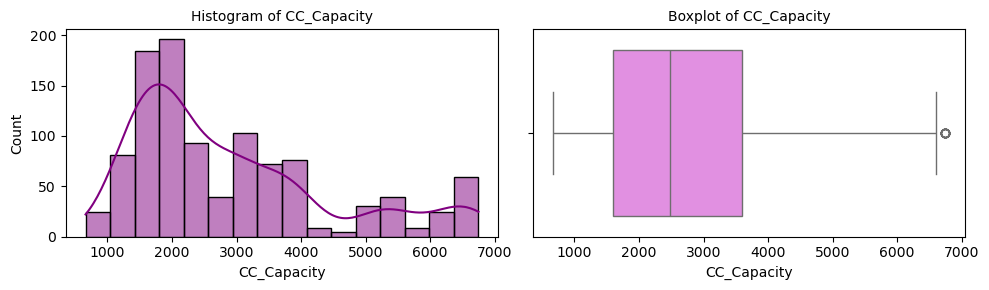

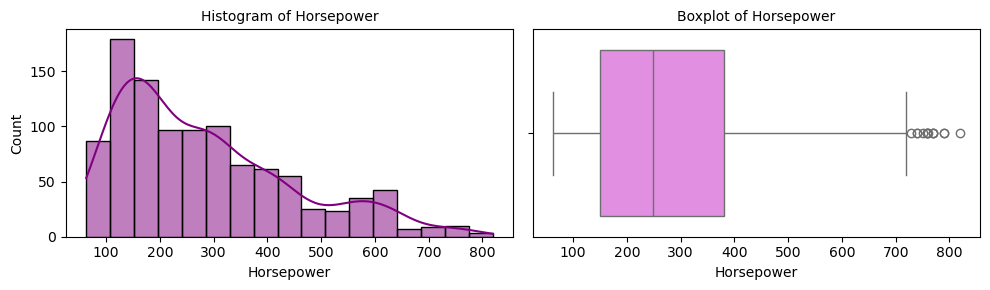

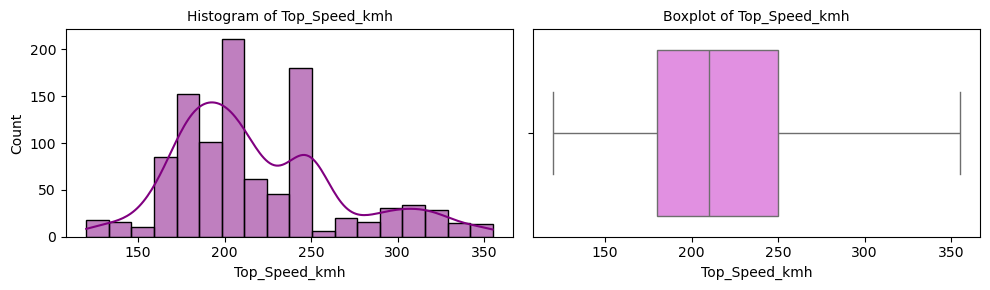

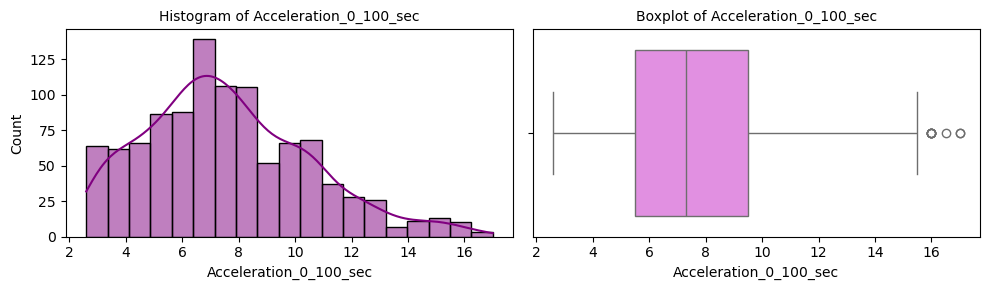

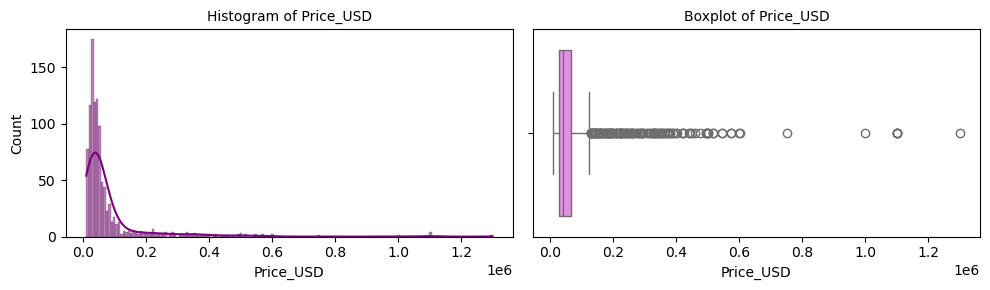

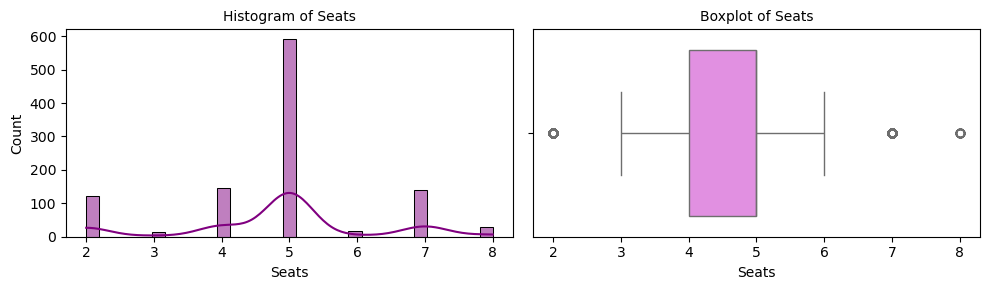

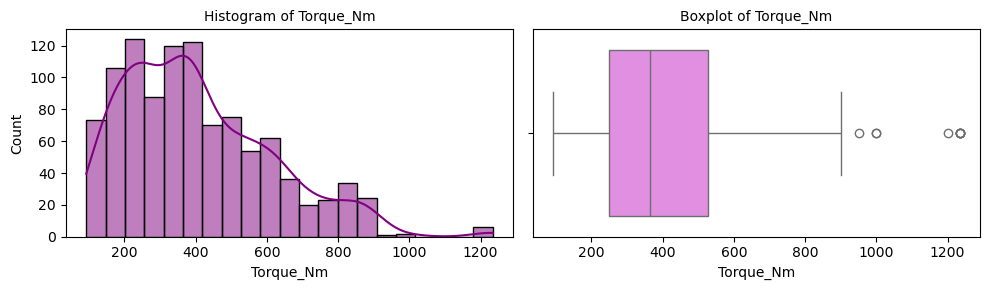

In [7]:
# vẽ box và his của quatitive trên mỗi column bằng seaborn ( loại bỏ 1%^ outlier ngoài biên)
for col in quantitative_columns:
    plt.figure(figsize=(10, 3))
    
    # Cắt 1% đầu và 1% cuối để loại bỏ outliers quá mạnh
    lower, upper = np.percentile(data[col].dropna(), [1, 99])
    filtered = data[(data[col] >= lower) & (data[col] <= upper)]

    plt.subplot(1, 2, 1)
    sns.histplot(filtered, x=col, kde=True, color="purple")
    plt.title(f"Histogram of {col}", fontsize=10)


    plt.subplot(1, 2, 2)
    sns.boxplot(x=filtered[col], color="violet")
    plt.title(f"Boxplot of {col}", fontsize=10)
    
    plt.tight_layout()
    plt.show()

## Qualitative columns with char plot and count plot

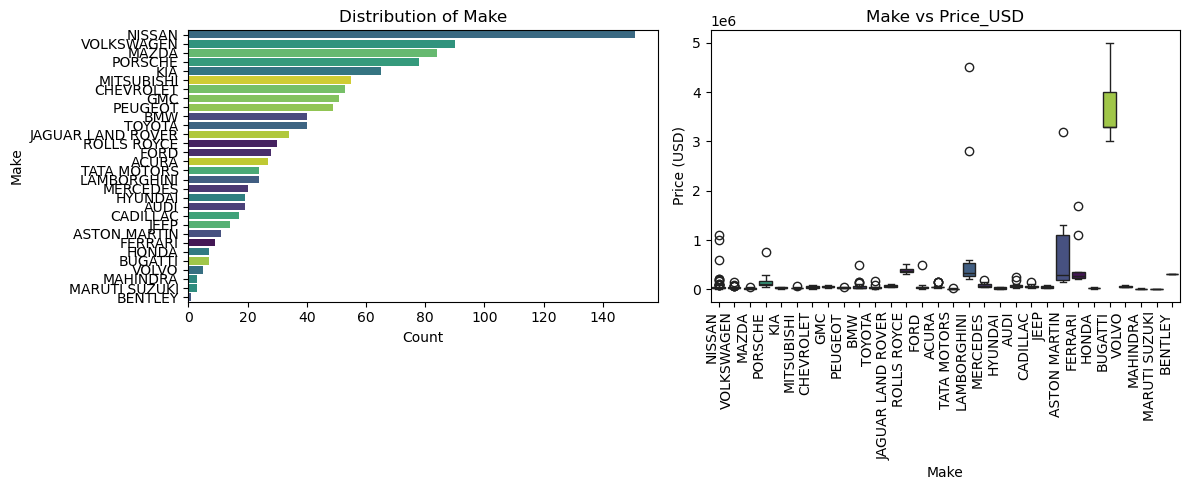

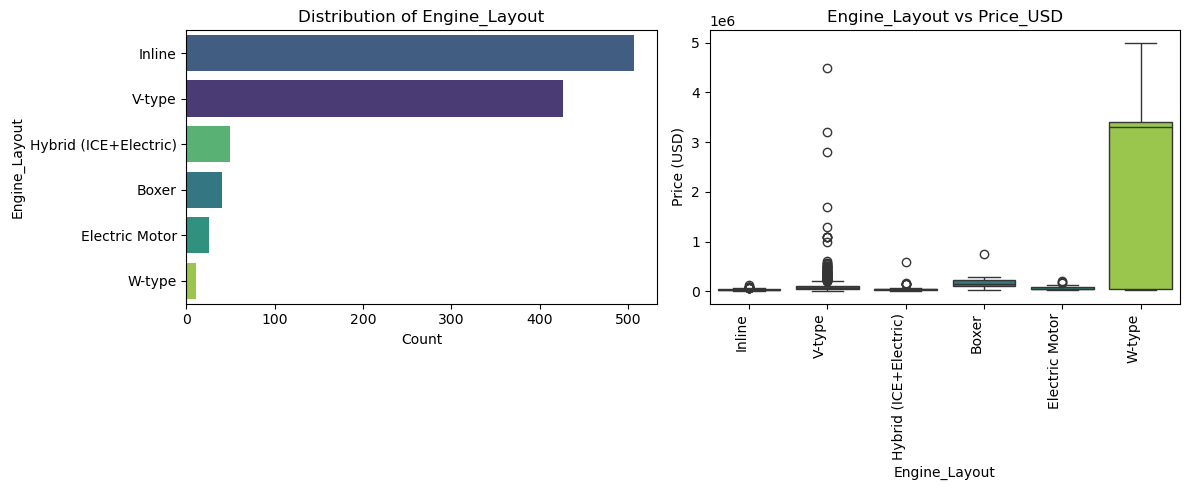

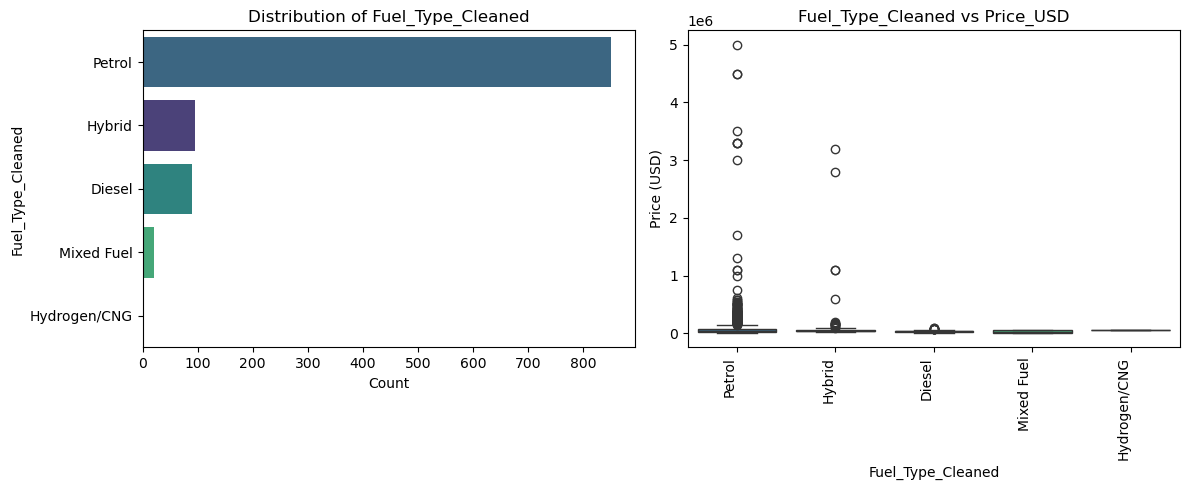

In [8]:
cols_to_plot = ['Make', 'Engine_Layout', 'Fuel_Type_Cleaned']

for col in cols_to_plot:
    plt.figure(figsize=(12, 5))

    # Biểu đồ count
    plt.subplot(1, 2, 1)
    sns.countplot(y=col, data=data, order=data[col].value_counts().index,
                  hue=col, legend=False, palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)

    # Boxplot khi so sánh với giá
    plt.subplot(1, 2, 2)
    sns.boxplot(x=col, y="Price_USD", data=data, 
                order=data[col].value_counts().index, 
                hue=col, legend=False, palette="viridis")
    plt.title(f"{col} vs Price_USD")
    plt.ylabel("Price (USD)")
    plt.xlabel(col)
    plt.xticks(rotation=90, ha='right')

    plt.tight_layout()
    plt.show()